<p>Ben Trey<br>
Project: Capstone Project 1: Exploratory Data Analysis<br>
Data Science Track<br>
2020/10/15<br>
</p>

<h1>Simulation Code</h1>

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import sys
import warnings
import pickle
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB

#Global variables
directory = 'C:/Users/我的电脑/Desktop/APAI'
df_problems = pd.read_csv(directory+'/problem_data.csv')
num_of_problems = df_problems.count()['id']
normalizations = {}

warnings.filterwarnings('ignore')

<h1>Classes</h1>

In [116]:
#Student will simulate a students performance 
class Student:
    def __init__(self, email):
        #ability represents a student's baseline math skills
        #intelligence represents a student's potential for growth
        #motivation represents a student's motivation for growth 
        #consistency represents a student's consistency in performance
        self.email = email
        school_quality = np.random.random()
        self.ability = school_quality - 1.0 + 2.0*np.random.random()
        self.intelligence = school_quality - 1.0 + 2.0*np.random.random()
        self.motivation = school_quality - 1.0 + 2.0*np.random.random()
        self.consistency = school_quality - 1.0 + 2.0*np.random.random()
        self.frustration = 0
        self.topics = {}
        self.units = {}
        
    #problemUpdate updates the student's math ability after a correct problem    
    def problem_update(self, correct, problem):
        unit = str(problem.unit)
        topic = unit+'.'+str(problem.topic)
        difficulty = problem.difficulty
        if not topic in self.topics.keys():
            self.topics[str(topic)]=-1.0+2.0*np.random.random()
        if not unit in self.units.keys():
            self.topics[str(unit)]=-1.0+2.0*np.random.random()
        if correct:
            #increase intelligence with a certain probability
            #increase consistency with a certain probability
            #increase motivation with a certain probability
            if np.exp(self.ability) / (1+np.exp(self.ability)) > np.random.random():
                self.ability = self.ability + difficulty/300.0
            if np.exp(self.intelligence) / (1+np.exp(self.intelligence)) > np.random.random():
                self.intelligence = self.intelligence + difficulty/3000.0
            if np.exp(self.consistency)/(1+np.exp(self.consistency)) > np.random.random():
                self.consistency = self.consistency + difficulty/3000.0
            if np.exp(self.motivation)/(1+np.exp(self.motivation)) > np.random.random():
                self.motivation = self.motivation + difficulty/300.0
            if np.exp(self.topics[topic])/(1+np.exp(self.topics[topic])) >np.random.random():
                self.topics[topic] = self.topics[topic]+difficulty/300.0
            if np.exp(self.units[unit])/(1+np.exp(self.units[unit])) >np.random.random():
                self.units[unit] = self.units[unit]+difficulty/300.0
            if np.exp(self.frustration)/(1+np.exp(self.frustration)) < np.random.random():
                self.frustration = self.frustration - difficulty/10.0
        else:
            #decrease ability with a certain probability
            #decrease intelligence with a certain probability
            #decrease consistency with a certain probability
            #decrease motivation with a certain probability
            if np.exp(self.ability)/(1+np.exp(self.ability)) < np.random.random():
                self.math_ability = self.ability - difficulty/ 300.0
            if np.exp(self.intelligence)/(1+np.exp(self.intelligence)) < np.random.random():
                self.intelligence = self.intelligence - difficulty/3000.0
            if np.exp(self.consistency)/(1+np.exp(self.consistency)) < np.random.random():
                self.consistency = self.consistency - difficulty/3000.0
            if np.exp(self.motivation)/(1+np.exp(self.motivation)) < np.random.random():
                self.motivation = self.motivation - difficulty/300.0
            if np.exp(self.topics[topic])/(1+np.exp(self.topics[topic])) < np.random.random():
                self.topics[topic] = self.topics[topic] - difficulty/300.0
            if np.exp(self.units[unit])/(1+np.exp(self.units[unit])) < np.random.random():
                self.units[unit] = self.units[unit] - difficulty/300.0
            if np.exp(self.frustration)/(1+np.exp(self.frustration)) > np.random.random():
                self.frustration = self.frustration + difficulty/10.0
        
    def will_continue(self, time):
        return self.motivation*150.0/time > (np.random.random()*logistic(self.frustration))**(0.5)

    def answer_problem(self, problem):
        if not problem.topic in self.topics.keys():
            self.topics[str(problem.topic)]=-1.0+2.0*np.random.random()
            if np.exp(self.frustration)/(1+np.exp(self.frustration)) > np.random.random():
                self.frustration = self.frustration + 1/10.0
        if not problem.unit in self.units.keys():
            self.units[str(problem.unit)]=-1.0+2.0*np.random.random()
        return (self.units[problem.unit]*self.topics[problem.topic]*self.ability*self.intelligence)**0.25 \
                > (np.random.random()*problem.difficulty)**0.5
            
        
#Problem simulates a problem
class Problem:
    def __init__(self, unit, topic, difficulty):
        self.unit = str(unit)
        self.topic = str(topic)
        self.difficulty = difficulty

#Student_Profile holds the students info seperately from their attributes 
class Student_Profile:
    def __init__(self, real_name, user_name, password, email):
        self.number_correct = 0
        self.scores = {}
        self.real_name = real_name
        self.user_name = user_name
        self.password = password
        self.email = email

#user_name_creator makes the user names for the students
def user_name_creator():
    pre=['dank', 'snarky', 'lunar', 'fiesty', 'fruity', 'spicy', 'spikey', 'slippery', 'sleepy', \
        'spooky', 'blinking', 'burping', 'sugary', 'dark', 'dinky', 'droopy', 'blind', 'hairy', \
        'hip', 'lame', 'fiery']
    fix=['tiger', 'shark', 'wheels', 'nightmare', 'guitar', 'pants', 'cat', 'blinker', 'bum', \
        'bacon', 'stinker', 'stripe', 'horse', 'monkey', 'popeye', 'eyes', 'moves', 'figher', \
        'liner', 'drifter', 'docker']
    return np.random.choice(pre) + np.random.choice(fix) + str(np.random.randint(1,1000))

#password_creator makes a password
def password_creator():
    chars = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890!@#$%^&*'
    password = ''
    while len(password) < 10:
        password += chars[np.random.randint(0,len(chars)-1)]
    return password

#real_name_creator makes a real name
def real_name_creator():
    first = ['Abe', 'Michael', 'Blanche', 'Bobby', 'Johnny', 'Ryan', 'Jasmine', 'Sarah', 'Jenny', \
        'Josey', 'Eva', 'Wendy', 'Kelly', 'Wayne', 'Larry', 'Cindy', 'Sunny', 'Yolanda', 'Coco', \
        'Helen', 'Barette', 'Judy', 'Teddy', 'Frank', 'Victor', 'Yvonne', 'Howard', 'Richard', \
        'Angel', 'Harry', 'Sammy', 'Alex', 'Albert', 'David', 'Lester', 'Maddy', 'Patrick', \
        'Holly', 'Dan', 'Matt', 'Violet', 'Skylar', 'Patricia', 'Oscar', 'Edgar', 'Owen', 'Eric', \
        'Grace', 'Amy', 'Otto', 'Gunther', 'Franz', 'Lina', 'Nora','Angela', 'Olivia','Oliver']
    last = ['Zhang', 'Zhu', 'Ma', 'Xu', 'Wang', 'Liu', 'Li', 'Lin', 'Smith', 'Jones', 'Jackson', \
        'James', 'Johnson', 'Oneal', 'Riley', 'Maxwell', 'Baker', 'Lenz', 'Goldstein', 'Feldman', \
        'Rothschild', 'Kruger', 'Lowenstein', 'Young', 'Parker', 'Morgan', 'Barker', 'Dunn', \
        'Bradley' 'Woods', 'Jordan', 'McGrady', 'Austin', 'Hogan', 'McGuiness', 'Park']
    return np.random.choice(first) + ' ' + np.random.choice(last)

#email_creator creates an email
def email_creator():
    pre = ['dirty', 'milky', 'fishy', 'slimy', 'used', 'old', 'tired', 'slightly', 'mostly', \
        'found', 'lost', 'new', 'freshy', 'daily', 'buried', 'acient', 'retired', 'deep', 'moist', \
        'dry', 'hot', 'cold', 'folding', 'extra', 'replacement', 'clamy', 'soiled']
    fix = ['bread', 'beans', 'bike', 'tire', 'blanket', 'rug', 'window', 'chrysler', 'jeep', \
        'sub', 'drum', 'snake', 'shoes', 'shirt', 'hat', 'jug', 'shack', 'tide', 'spice', 'cola', \
        'cup', 'skates']
    provider = ['yahoo.com', 'gmail.com', 'outlook.com', 'qq.com', '163.com']
    return np.random.choice(pre) + np.random.choice(fix) + str(np.random.randint(1,1000)) + '@' \
        + np.random.choice(provider)

<h1>Distributions</h1>

In [117]:
def problem_index_getter(number_correct):
    if number_correct == 0:
        return 0
    if normalizations.get(number_correct,0) == 0:
        sum = 0
        for problem in range(number_correct):
            sum += 0.05 + np.exp(-(problem+1-number_correct)**2/2)/(2*np.pi)**0.5
        normalizations[number_correct] = sum
    normalization = normalizations[number_correct]
    sum = 0
    random_value = np.random.random()
    for problem in range(num_of_problems):
        sum += 0.1 + np.exp(-(problem-number_correct)**2/2)/(2*np.pi)**0.5
        if random_value < sum:
            return problem 

<h1>Helper Functions</h1>

In [118]:
#standard logistic function
def logistic(value):
    return 1/(1+np.exp(-value))

<h1>Simulations</h1>

In [146]:
def data_maker():
    data_lines = ['number_correct_lifetime,number_attempted_this_session,topic_ratio,number_in_topic,difficulty,time,will_continue']
    tries = []
    #make problems
    problems = {}
    problem_keys = []
    df_problems = pd.read_csv(directory+'/problem_data.csv')
    for index, row in df_problems.iterrows():
        problem_id = df_problems.iloc[index][0]
        unit = df_problems.iloc[index][1]
        topic = df_problems.iloc[index][2]
        difficulty = df_problems.iloc[index][3]/2
        problems[(unit,topic,problem_id)] = Problem(unit,topic,difficulty)
        problem_keys.append((unit,topic,problem_id))
    problem_keys.sort()
    #make students
    num_of_students = 1000
    students = {}
    student_profiles = {}
    while len(students) < num_of_students:
        email = email_creator()
        user_name = user_name_creator()
        real_name = real_name_creator()
        password = password_creator()
        if not email in students.keys():
            students[email] = Student(email)
            student_profiles[email] = Student_Profile(real_name, user_name, password, email)
    #simulate sessions
    num_of_sessions = 5000
    for session in tqdm(range(num_of_sessions)):
        email = np.random.choice(list(students.keys()))
        number_correct = student_profiles[email].number_correct
        time = 0
        students[email].frustration = 0
        will_continue = True
        number_attempted_this_session = 0
        while will_continue:
            number_attempted_this_session += 1
            problem_index = np.random.randint(0,num_of_problems)
            unit = str(problem_keys[problem_index][0])
            key = str(problem_keys[problem_index][0])+'.'+str(problem_keys[problem_index][1])
            problem_id = problem_keys[problem_index][2]
            if not key in student_profiles[email].scores.keys():
                student_profiles[email].scores[key] = [0,0]
            correct = students[email].answer_problem(problems[problem_keys[problem_index]])
            student_profiles[email].scores[key][0] += 1
            student_profiles[email].scores[key][1] += int(correct)
            student_profiles[email].number_correct += int(correct)
            students[email].problem_update(correct,problems[problem_keys[problem_index]])
            problems[problem_keys[problem_index]].difficulty = problems[problem_keys[problem_index]].difficulty\
                        *999/1000 - int(correct)/1000
            time += 60+20*(logistic(students[email].intelligence)*logistic(students[email].motivation))**0.5
            will_continue = students[email].will_continue(time)
            data_line = str(student_profiles[email].number_correct)+','+str(number_attempted_this_session)+','\
                        +str(student_profiles[email].scores[key][1]/student_profiles[email].scores[key][0])+','\
                        +str(student_profiles[email].scores[key][0])+','\
                        +str(problems[problem_keys[problem_index]].difficulty)+','+str(time)+','+str(int(will_continue))
            data_lines.append(data_line)
        tries.append(str(number_attempted_this_session))
    file = open(directory+'/experiment.csv','w+')
    file.write('\n'.join(data_lines))
    file.close()
    file = open(directory+'/tries.csv','w+')
    file.write('\n'.join(tries))
    file.close()
            
            
    #number_correct_lifetime, number_attempted_this_session,topic_ratio,number_in_topic, difficulty
 


def simulation():
    #train model
    df_experiment = pd.read_csv(directory+'/experiment.csv')
    # Split the data into a training and test set.
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_experiment[['number_correct_lifetime', 'number_attempted_this_session',\
                                                                 'topic_ratio', 'number_in_topic', 'difficulty', 'time']].values, 
                                              df_experiment[['will_continue']].values,random_state=5)

    clf = LogisticRegression(solver='lbfgs')
    # Fit the model on the trainng data.
    clf.fit(Xlr, ylr)
    filename = directory+'/model.sav'
    pickle.dump(clf, open(filename, 'wb'))
    # Print the accuracy from the testing data.
    print(accuracy_score(clf.predict(Xtestlr), ytestlr))
    #experiment long variables
    data_lines = ['number_correct_lifetime,number_attempted_this_session,topic_ratio,number_in_topic,difficulty,time,will_continue']
    tries = []
    #make problems
    problems = {}
    problem_keys = []
    df_problems = pd.read_csv(directory+'/problem_data.csv')
    for index, row in df_problems.iterrows():
        problem_id = df_problems.iloc[index][0]
        unit = df_problems.iloc[index][1]
        topic = df_problems.iloc[index][2]
        difficulty = df_problems.iloc[index][3]/2
        problems[(unit,topic,problem_id)] = Problem(unit,topic,difficulty)
        problem_keys.append((unit,topic,problem_id))
    problem_keys.sort()
    #make students
    num_of_students = 1000
    students = {}
    student_profiles = {}
    while len(students) < num_of_students:
        email = email_creator()
        user_name = user_name_creator()
        real_name = real_name_creator()
        password = password_creator()
        if not email in students.keys():
            students[email] = Student(email)
            student_profiles[email] = Student_Profile(real_name, user_name, password, email)
    #simulate sessions
    num_of_sessions = 5000
    for session in tqdm(range(num_of_sessions)):
        email = np.random.choice(list(students.keys()))
        number_correct = student_profiles[email].number_correct
        time = 0
        students[email].frustration = 0
        will_continue = True
        number_attempted_this_session = 0
        while will_continue:
            number_correct = student_profiles[email].number_correct
            number_attempted_this_session += 1
            if number_correct<3:
                problem_index = random.randint(0,2)
            else:
                problem_indices = []
                while len(problem_indices)<3:
                    index = problem_index_getter(number_correct)
                    if index not in problem_indices:
                        problem_indices.append(index)
                problem_index = problem_indices[0]
                best_score = -np.inf
                for index in problem_indices:
                    key = str(problem_keys[index][0])+'.'+str(problem_keys[index][1])
                    if student_profiles[email].scores.get(key,[0,0]) == [0,0]:
                        student_profiles[email].scores[key] = [0,0]
                        topic_ratio = 0
                    else:
                        topic_ratio = student_profiles[email].scores[key][1]/student_profiles[email].scores[key][0]
                    number_in_topic=student_profiles[email].scores[key][0]
                    test_df = pd.DataFrame(columns=df_experiment.columns.drop('will_continue'))
                    difficulty = problems[problem_keys[index]].difficulty
                    test_df = test_df.append({'number_correct_lifetime':number_correct, \
                        'number_attempted_this_session':number_attempted_this_session,\
                        'topic_ratio':topic_ratio, 'number_in_topic':number_in_topic, 'difficulty':difficulty,\
                        'time':time}, ignore_index=True)
                    test_score = clf.predict_proba(test_df)[0][1]
                    if test_score > best_score:
                        problem_index = index
                        best_score = test_score
            unit = str(problem_keys[problem_index][0])
            key = str(problem_keys[problem_index][0])+'.'+str(problem_keys[problem_index][1])
            problem_id = problem_keys[problem_index][2]
            if not key in student_profiles[email].scores.keys():
                student_profiles[email].scores[key] = [0,0]
            correct = students[email].answer_problem(problems[problem_keys[problem_index]])
            student_profiles[email].scores[key][0] += 1
            student_profiles[email].scores[key][1] += int(correct)
            student_profiles[email].number_correct += int(correct)
            students[email].problem_update(correct,problems[problem_keys[problem_index]])
            problems[problem_keys[problem_index]].difficulty = problems[problem_keys[problem_index]].difficulty\
                        *999/1000 - int(correct)/1000
            time += 60+20*(logistic(students[email].intelligence)*logistic(students[email].motivation))**0.5
            will_continue = students[email].will_continue(time)
            data_line = str(student_profiles[email].number_correct)+','+str(number_attempted_this_session)+','\
                        +str(student_profiles[email].scores[key][1]/student_profiles[email].scores[key][0])+','\
                        +str(student_profiles[email].scores[key][0])+','\
                        +str(problems[problem_keys[problem_index]].difficulty)+','+str(time)+','+str(int(will_continue))
            data_lines.append(data_line)
        tries.append(str(number_attempted_this_session))
    file = open(directory+'/experiment_simulation.csv','w+')
    file.write('\n'.join(data_lines))
    file.close()
    file = open(directory+'/tries_simulation.csv','w+')
    file.write('\n'.join(tries))
    file.close()

In [140]:
data_maker()

In [147]:
simulation()

0.6559520566603105


<h1>Graph Makers</h1>

In [142]:
def just_make_a_graph(tries, title):
    print('probability of quitting after one problem',tries.count(1)/len(tries))
    print('mean tries problem',sum(tries)/len(tries))
    plt.hist(tries,bins=12)
    plt.title(title)
    plt.xlabel('Tries')
    plt.ylabel('Occurences')
    plt.show()

probability of quitting after one problem 0.3514
mean tries problem 3.0522


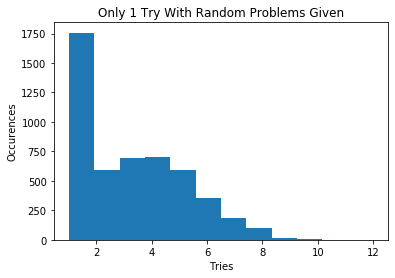

In [143]:
file = open(directory+'/tries_simulation.csv')
data = [int(tries) for tries in file.read().split('\n')]
file.close()
just_make_a_graph(data,'Only 1 Try With Random Problems Given')

probability of quitting after one problem 0.3842
mean tries problem 2.9364


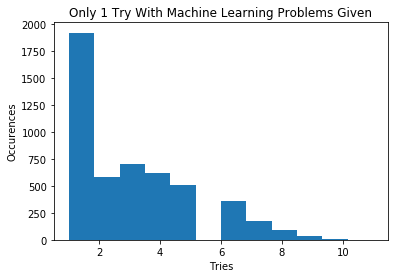

In [144]:
file = open(directory+'/tries.csv')
data_simulation = [int(tries) for tries in file.read().split('\n')]
file.close()
just_make_a_graph(data_simulation,'Only 1 Try With Machine Learning Problems Given')

In [145]:
total_data = data+data_simulation
data_mean = np.mean(data)
data_simulation_mean = np.mean(data_simulation)
size = int(len(total_data)/2)
trials = 10**4
mean_diffs=np.empty(trials)
for trial in tqdm(range(trials)):
    sample_1 = np.random.choice(total_data,size,replace=True)
    sample_2 = np.random.choice(total_data,size,replace=True)
    mean_diffs[trial] = np.mean(sample_1)-np.mean(sample_2)
p=np.sum(mean_diffs >= data_mean-data_simulation_mean)
print('p =',p/trials)


p = 0.0015
